## Data Cleaning Including Missing Values, Outliers, and Multi-Collinearity

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fraud_data = pd.read_csv('Fraud.csv')

In [5]:
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
fraud_data.shape

(6362620, 11)

In [9]:
fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

##### So, in the given dataset 'Fraud.csv', there is no missing value exist.

In [11]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
non_fraud_transaction = len(fraud_data[fraud_data.isFraud == 0])
fraud_transaction = len(fraud_data[fraud_data.isFraud == 1])
non_fraud_percent = (non_fraud_transaction / (fraud_transaction + non_fraud_transaction)) * 100
fraud_percent = (fraud_transaction / (fraud_transaction + non_fraud_transaction)) * 100

print("Number of Legit transactions: ", non_fraud_transaction)
print("Number of Fraud transactions: ", fraud_transaction)
print("Percentage of Legit transactions: {:.4f} %".format(non_fraud_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


In [15]:
new_data = fraud_data.copy()
object = new_data.select_dtypes(include=['object']).columns
new_data1 = new_data.drop(columns=object)

<Axes: >

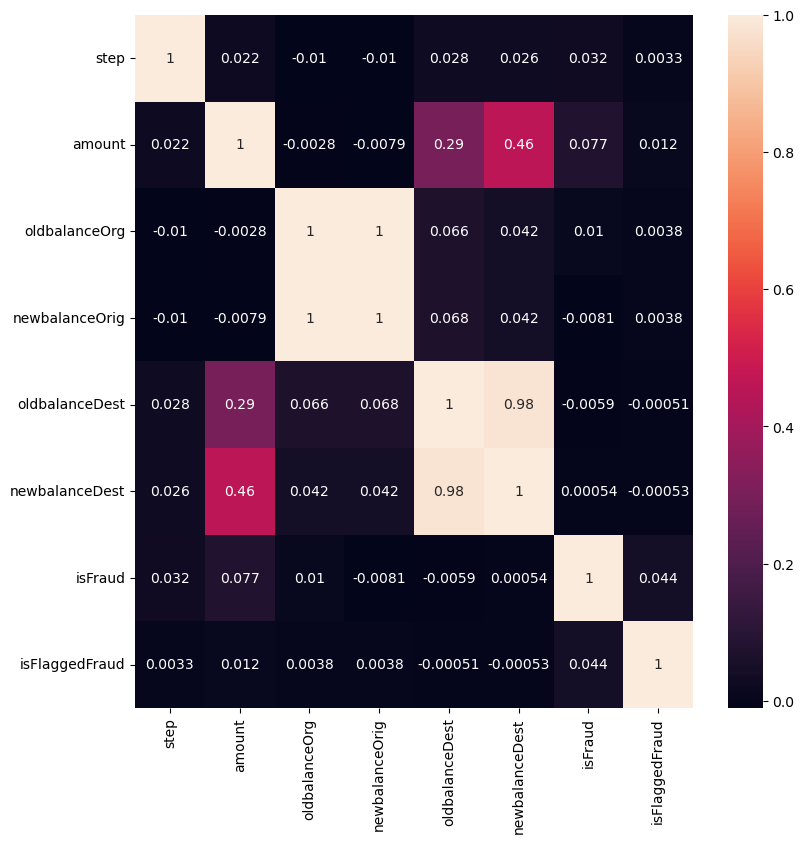

In [39]:
corr=new_data1.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True)

In [19]:
objList = new_data.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_data[feat] = le.fit_transform(new_data[feat].astype(str))

print (new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [25]:
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,6084274,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,1321111,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,2401,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5364739,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,2717760,41554.0,29885.86,828919,0.0,0.0,0,0


### We are using Varinace Influence Factor (VIF) to detect multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif)

calc_vif(new_data)

,variables,VIF
0,step,2.791688
1,type,4.465797
2,amount,4.149262
3,nameOrig,2.763857
4,oldbalanceOrg,576.805519
5,newbalanceOrig,582.713383
6,nameDest,3.301228
7,oldbalanceDest,73.346778
8,newbalanceDest,85.002377
9,isFraud,1.195316


### We know that the thumb rule of VIF is , if the VIF is exceeding 10 then there is strong multicollinearity present, so we are excluding the problematic variables from the dataset which show VIF > 10.

In [33]:
new_data['ActualOrig'] = new_data.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_data['ActualAmount'] = new_data.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_data['TransactionPath'] = new_data.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_data = new_data.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_data)

,variables,VIF
0,type,2.685697
1,amount,3.818831
2,isFraud,1.184514
3,isFlaggedFraud,1.002550
4,ActualOrig,1.308008
5,ActualAmount,3.754038
6,TransactionPath,2.675283


### After doing some adjustments, we can see that the multicollinearity has decreased and we can se that the VIF falls between 0 to 4 for all the variables.

<Axes: >

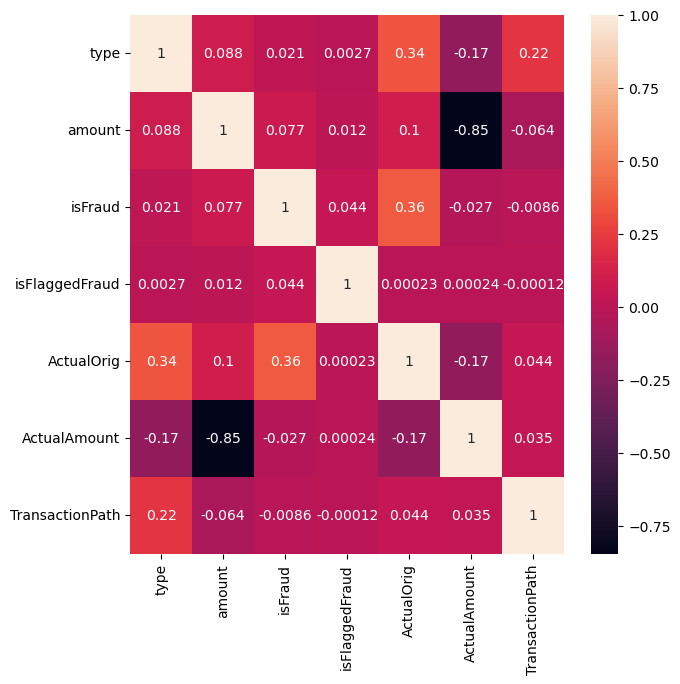

In [37]:
corr=new_data.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)

## Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
scaler = StandardScaler()
new_data["NormalizedAmount"] = scaler.fit_transform(new_data["amount"].values.reshape(-1, 1))
new_data.drop(["amount"], inplace= True, axis= 1)

Y = new_data["isFraud"]
X = new_data.drop(["isFraud"], axis= 1)

## Spiliting dataset into train (70%) and test (30%) dataset 

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


### We are Using Decision Tree , XGBoost and Artificial Neural Network (ANN) as fraud detection model

In [51]:
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.92361637187196


In [61]:
import xgboost as xgb

# Initialize XGBoost classifier
xgboost_model = xgb.XGBClassifier(n_estimators=100)

# Train the model
xgboost_model.fit(X_train, Y_train)

# Predict the test set results
Y_pred_xgb = xgboost_model.predict(X_test)

# Calculate the score (accuracy) on the test set
xgboost_score = xgboost_model.score(X_test, Y_test) * 100
print("XGBoost Score: ", xgboost_score)

XGBoost Score:  99.95735509376117


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann_model = Sequential()

ann_model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

ann_model.add(Dense(units=64, activation='relu'))

ann_model.add(Dense(units=1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_model.fit(X_train, Y_train, epochs=8, batch_size=32)

Y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

ann_score = ann_model.evaluate(X_test, Y_test)[1] * 100
print("ANN Score: ", ann_score)

Epoch 1/8


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


139183/139183 ━━━━━━━━━━━━━━━━━━━━ 90s 636us/step - accuracy: 0.9981 - loss: 96.5278
Epoch 2/8
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 87s 625us/step - accuracy: 0.9987 - loss: 0.0757
Epoch 3/8
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 89s 641us/step - accuracy: 0.9987 - loss: 0.0720
Epoch 4/8
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 89s 637us/step - accuracy: 0.9987 - loss: 0.1097
Epoch 5/8
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 89s 636us/step - accuracy: 0.9987 - loss: 0.0545
Epoch 6/8
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 89s 638us/step - accuracy: 0.9987 - loss: 0.1329
Epoch 7/8
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 89s 639us/step - accuracy: 0.9987 - loss: 0.1113
Epoch 8/8
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 90s 643us/step - accuracy: 0.9987 - loss: 0.1092
59650/59650 ━━━━━━━━━━━━━━━━━━━━ 31s 527us/step
59650/59650 ━━━━━━━━━━━━━━━━━━━━ 30s 497us/step - accuracy: 0.9987 - loss: 0.0097
ANN Score:  99.87243413925171


# Conclusion

## After seeing the Accuracy score we can see that the XGBoost performs better for fraud detection

## What are the key factors that predict fraudulent customer?

1. Transaction Amount:
Unusually high or low transaction amounts might indicate fraud.
2. Transaction Location:
Transactions made in unusual or distant locations from the user's normal activity could be flagged as suspicious.
3. Transaction Frequency:
A sudden increase in the frequency of transactions, especially within a short period, might indicate fraudulent activity.
4. User Behavior:
Changes in user behavior, such as login times or device usage, can be critical in identifying fraud.

## Do these factors make sense?

The above factors make sense also as fraudsters often show anomalous behaviour like making very large transactions, rapidly travelling to different locations or behaving differently from the legitimate user. The model is able to see these patterns and detect fraud.

## What kind of prevention should be adopted while company update its infrastructure?

1. Enhanced Security Protocols:
   Implement multi-factor authentication (MFA), encryption, and continuous monitoring systems to detect unusual activity in real-time.

2. Regular Audits: Conduct regular security audits and vulnerability assessments to identify and mitigate potential risks.

3. User Education: Educate users about common fraud tactics and encourage secure practices, such as using strong passwords and being cautious with phishing attempts.

## Assuming these actions have been implemented, how would you determine if they work?

I'm very confident that the no of frauds will goes down if the above mention steps have been implemented because we can see that the no. of frauds has been low than the no. of frauds before 5 years back. If the consumer is educated about the new frauds and the banks are implement strong authencaton system then the frauds will go down.  